# Derivative

The crucial concepts of calculus are **derivative** and **integral**.

The linear function

$$
    f(x) = ax + b
$$

is nice and simple, and its graph is a straight line. Using **differentiation** and **differentials** one can in some way reduce any **smooth** function to a linear one!


<!--
## Derivative

В курсе матанализа изучаются произвольные функции действительного аргумента,
однако, на практике в целом и в машинном обучении в частности обычно встречаются **дифференцируемые** (**гладкие**) функции, локально «похожие» на простую и понятную линейную функцию. «Малому приращению» $h=\Delta x$ аргумента гладкой функции $f$ соответствует «малое приращение» $\Delta f = f(x+h) - f(x)$ её значения, приблизительно пропорциональное $h$: $f(x+h) - f(x) \approx L(x)h$. Более формально, функция $f\colon \mathbb R \to\mathbb R$ дифференцируема в точке $x$, если 

$$
f(x + h) - f(x) = L(x)h + o(h), \quad \text{ где } L(x) = \lim\limits_{h\to 0} \frac{f(x+h)-f(x)}h =: f'(x)
$$

— **производная** функции $f$ в точке $x$. Геометрически это означает, что график функции $y=f(x)$ имеет касательную в точке $(x, f(x))$.

```{image} https://sites.millersville.edu/bikenaga/calculus1/derivatives/derivatives4.png
:align: center
```

-->

In [2]:
import numpy as np
import plotly.graph_objects as go

def tangent_line(x, x0):
    slope = np.cos(x0) 
    return slope * (x - x0) + np.sin(x0)


def plot_sin_tangent(x_min, x_max, point):
    x_values = np.linspace(x_min, x_max, 2000)
    y_sine = np.sin(x_values)
    y_tangent = tangent_line(x_values, point)

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=x_values, y=y_sine, mode='lines', name='y = sin(x)',  line=dict(width=3)))

    fig.add_trace(go.Scatter(x=x_values, y=y_tangent, mode='lines', name='Tangent line',  line=dict(width=2)))

    fig.add_trace(go.Scatter(x=[point], y=[np.sin(point)],
                         mode='markers', marker=dict(size=8, color='red'), name='point'))

    fig.add_hline(y=0)
    fig.add_vline(x=0)

    for trace in fig['data']: 
        if trace['name'] == 'point':
            trace['showlegend'] = False

    fig.update_layout(title='Sine function with a tangent line', xaxis_title='x', yaxis_title='y')

    return fig

plot_sin_tangent(-0.5*np.pi, np.pi, np.pi/3)

In a similar manner any smooth function is linear in a small neighborhood of the tangent point:

$$
    f(x + h) \approx f(x) + f'(x)h \text{ for small } h.
$$

A more scientific definition:

```{math}
:label: derivative-O-def
    f(x + h)= f(x) + f'(x)h + \mathcal O(h^2), \quad h\to 0.
```

```{admonition} Strict definition
:class: dropdown
The **derivative** of $f \colon (x-\delta, x+\delta) \to \mathbb R$, $\delta > 0$, at point $x$ is

$$
f'(x) = \lim\limits_{h\to 0} \frac{f(x+h)-f(x)}h.
$$

Existence of derivative $f'(x)$ is equivalent to **differentiability** of $f$ at point $x$:

$$
    f(x + h) - f(x) =  f'(x)h + o(h), \quad h\to 0.
$$

Note that {eq}`derivative-O-def` imply this equality but the converse is false.
```


## Differential

The function $df(x ,h) = f'(x)h$ is called **differential** of $f$ at point $x$. Note that it is a function of two variables $x$ and $h$, and the dependency on $h$ is linear.

```{important}
Due to historical reasons, the **increment** $h$ is often denoted as $dx$; then the formula for the differential is

$$
    df = f'(x)dx.
$$
```

Differential is the main linear part of the increment $\Delta f = f(x + h) - f(x)$.

## Rules of differentiation

**Derivative:**

1. $f'(x) \equiv 0$ if $f(x)\equiv \mathrm{const}$

2. $(\alpha f(x) + \beta g(x))' = \alpha f'(x) + \beta g'(x)$

3. $(f(x)g(x))' = f'(x) g(x) + f(x) g'(x)$

4. $\big(\frac{f(x)}{g(x)}\big)' = \frac{f'(x) g(x) - f(x) g'(x)}{g^2(x)}$ if $g(x) \ne 0$

5. $((f \circ g)(x))' = f'(g(x)) g'(x)$ (**chain rule**)

**Differential:**

1. $d(\alpha f + \beta g) = \alpha df + \beta dg$

2. $d(fg) = fdg + g df$

3. $d\big(\frac fg\big) = \frac{gdf - f dg}{g^2}$

4. $d(f \circ g)(x) = df(g(x)) = f'(g(x)) \cdot dg(x)$ (**chain rule**)

## Derivatives of higher orders

If the function $f'(x)$ is also differentiable, then its derivative is called the **second derivative** of $f$: $f''(x) =\frac d{dx}(f'(x))$. By indtuction, $n$-th derivative is defined as

$$
    f^{(n)}(x) = \frac d{dx}\big(f^{(n-1)}(x)\big).
$$

To find the **second differential** of $f$ just differentiate $df(x) = f'(x) dx$ with respect to $x$ assuming that $dx$ is a constant:

$$
    d^2 f(x) = f''(x) dx^2, \quad d^n(x) = d(d^{n-1}f)(x) = f^{(n)}(x) dx^n.
$$

A function $f \colon [a, b] \to \mathbb R$ is called **continuously differentiable** $n$ times (denoted as $f \in C^n[a, b]$) if its $n$-th derivative is continuous: $f^{(n)} \in C[a, b]$. If $f \in C^{n+1}[a, b]$ then the **Taylor formula** holds:

$$
    f(x) = f(a) + f'(a)(x-a) + \frac 12 f''(a)(x-a)^2 + \ldots + \frac {f^{n}}{n!}(x-a)^n + r_n,
$$

where remainder term $r_n$ is

$$
    r_n = \frac {f^{n+1}(c)}{(n+1)!}(c-a)^{n+1}, \quad a < c < x.
$$

If $\lim\limits_{n\to\infty} r_n = 0$, the function $f$ can be expanded into **Taylor series**:

$$
    f(x) = \sum\limits_{k=0}^\infty \frac{f^{(k)}(a)}{k!}(x-a)^k.
$$

If $a=0$ the Taylor series if called **Maclaurin series**.

```{admonition} Example
:class: tip
If $f(x) = e^x$ then $f^{(k)}(x) = e^x$ for all $k\in\mathbb N$. Also,

$$
    r_n = \frac{e^c}{(n+1)!}c^n \to 0, \quad n\to\infty.
$$

Hence,

$$
    e^x = \sum\limits_{k=0}^\infty \frac{x^k}{k!}, \quad x \in \mathbb R.
$$
```




In [5]:
import numpy as np
from scipy.special import factorial
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_exp_taylor(max_n=10, x_min=-3, x_max=3, write_html=False):
    fig = make_subplots(rows=1, cols=2)
    xs = np.linspace(x_min, x_max, num=1001)
    fig.add_trace(go.Scatter(
                x=xs,
                y=np.exp(xs),
                name=f"exp(x)",
                visible=True,
                mode="lines",
                marker_color="red"
            ),
                 row=1, col=1)
    polynom = np.ones_like(xs)
    for n in range(1, max_n + 1):
        polynom += xs ** n / factorial(n)
        fig.add_trace(
            go.Scatter(
                x=xs,
                y=polynom,
                name=f"degree {n}",
                visible=False,
                mode="lines",
                marker_color="blue"
            ),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(
                x=xs,
                y=np.abs(np.exp(xs) - polynom),
                name=f"residual",
                visible=False,
                mode="lines",
                marker_color="green"
            ),
            row=1, col=2
        )
        

    fig.update_layout(title={"text": "Exponent Taylor approximation", "x": 0.5},
                      xaxis_title=r"x",
                      yaxis_title=r"y",
                      # xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = n // 10),
                      margin=dict(t=50),
                      showlegend=True
                     )
    
    i_vis = 1
    fig.data[i_vis].visible = True
    fig.data[i_vis + 1].visible = True
    fig.add_vline(0)
    fig.add_hline(0)
    
    # Create and add slider
    steps = []
    for i in range(1, max_n + 1):
        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig.data)}],  # layout attribute
            label=str(i)
        )
        step["args"][0]["visible"][0] = True  # Toggle i'th trace to "visible"
        step["args"][0]["visible"][2*i - 1] = True
        step["args"][0]["visible"][2*i] = True
        steps.append(step)

    sliders = [dict(
        active=i_vis - 1,
        pad={"t": 50},
        currentvalue={"prefix": r"n="}, 
        steps=steps
    )]
        
    fig.update_layout(
        sliders=sliders,
    )
    if write_html:
        fig.write_html("taylor_slider.html", full_html=False, include_plotlyjs='cdn', include_mathjax='cdn')
    fig.show()

In [6]:
plot_exp_taylor()

## Applications of derivatives

1. If $f'(x) > 0$ ($f'(x) < 0$) for all $x\in (a, b)$, then $f$ is increasing (decreasing) on $(a, b)$.

2. If $f'(x) = 0$ and $f''(x) > 0$ ($f''(x) < 0$), then $x$ is a local minimum (maximum) of $f$.

3. If $f''(x) > 0$ ($f''(x) < 0$) for all $x\in (a, b)$, then $f$ is strictly convex (concave) on $(a, b)$

```{figure} https://i.stack.imgur.com/GNBZ4.png
:align: center
```

## Numeric optimization methods

In practice optimization problem $f(x) \to \min\limits_x$ often cannot be solved analytically. However, if we can calculate $f'(x)$ for any point $x$, the sign of the derivative will show us the direction of the decrease of the function $f$.

Let $\eta >0$. The point of minimum of $f$ can be found by one of the following iterative algorithms:

1. **Gradient descent**

    $$
    x_{n+1} = x_n - \eta f'(x_n)
    $$

2. **Newton's method**

    $$
    x_{n+1} = x_n - \eta \frac{f'(x_n)}{f''(x_n)}
    $$

3. **Secant method**

    $$
    x_{n+1} = x_n - \eta \frac{x_n - x_{n-1}}{f'(x_n) - f'(x_{n-1})}f'(x_n)
    $$

Note that in Newton's method we need to have access to the second derivative of $f$ whereas in two other methods only to the first. In secant method the value of $f''(x_n)$ is approximated by the finite difference $\frac{f'(x_n) - f'(x_{n-1})}{x_n - x_{n-1}}$.

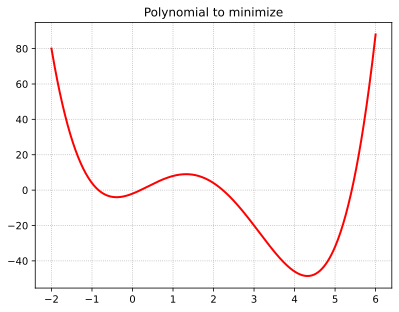

In [112]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'

class Oracle:
    def __init__(self, coef):
        self._coef = coef
    
    def func(self, x):
        return x**4 + self._coef[0] + self._coef[1]*x + self._coef[2]*x**2 + self._coef[3] * x**3

    def grad(self, x):
        """
        Computes the gradient at point x.
        """
        return 4*x**3 + self._coef[1] + 2*self._coef[2]*x + 3*self._coef[3] * x**2
    
    def hess(self, x):
        """
        Computes the Hessian matrix at point x.
        """
        return 12*x**2 + 2*self._coef[2] + 6*self._coef[3] * x
    
o4 = Oracle([ -2,   9, 7,  -7])

xs = np.linspace(-2, 6, 501)
plt.plot(xs, o4.func(xs), lw=2, c='r', label="f(x)")
plt.title("Polynomial to minimize")
plt.grid(ls=":");


Implement three optimization methods:

In [96]:
def gd(oracle, x_0, eta=2e-3, eps=1e-6, max_iter=1000):
    x_star = x_0
    for i in range(max_iter):
        gradient = oracle.grad(x_star)
        if abs(gradient) < eps:
            return "success", x_star, i
        x_star -= eta * oracle.grad(x_star)
    return "Iterations exceeded", x_star, max_iter

def newton(oracle, x_0, eta=0.5, eps=1e-6, max_iter=1000):
    x_star = x_0
    for i in range(max_iter):
        gradient = oracle.grad(x_star)
        if abs(gradient) < eps:
            return "success", x_star, i
        x_star -= eta * gradient / oracle.hess(x_star)
    return "Iterations exceeded", x_star, max_iter

def secant(oracle, x_0, eta=0.5, eps=1e-6, max_iter=1000):
    x_star, x_prev = x_0, x_0 + 2*eps
    for i in range(max_iter):
        gradient = oracle.grad(x_star)
        if abs(gradient) < eps:
            return "success", x_star, i
        x_star, x_prev = x_star - eta * oracle.grad(x_star) / (oracle.grad(x_star) - oracle.grad(x_prev)) * (x_star - x_prev), x_star
    return "Iterations exceeded", x_star, max_iter

Try several starting points:

In [97]:
def print_result(result, method_name, oracle):
    print(method_name, result[0])
    print("Number of iterations:", result[2])
    print("Point of minimum: {:.3f}".format(result[1]))
    print("Function value: {:.3f}".format(oracle.func(result[1])))

print_result(gd(o4, -5), "GD", o4)
print_result(newton(o4, -5), "Newton", o4)
print_result(secant(o4, -5), "secant", o4)

GD success
Number of iterations: 255
Point of minimum: -0.393
Function value: -4.007
Newton success
Number of iterations: 32
Point of minimum: -0.393
Function value: -4.007
secant success
Number of iterations: 34
Point of minimum: -0.393
Function value: -4.007


In [98]:
print_result(gd(o4, 0), "GD", o4)
print_result(newton(o4, 0), "Newton", o4)
print_result(secant(o4, 0), "secant", o4)

GD success
Number of iterations: 251
Point of minimum: -0.393
Function value: -4.007
Newton success
Number of iterations: 22
Point of minimum: -0.393
Function value: -4.007
secant success
Number of iterations: 22
Point of minimum: -0.393
Function value: -4.007


In [101]:
print_result(gd(o4, 2), "GD", o4)
print_result(newton(o4, 2), "Newton", o4)
print_result(secant(o4, 2), "secant", o4)

GD success
Number of iterations: 183
Point of minimum: 4.319
Function value: -48.549
Newton success
Number of iterations: 3
Point of minimum: 1.324
Function value: 9.013
secant success
Number of iterations: 24
Point of minimum: 1.324
Function value: 9.013


In [102]:
print_result(gd(o4, 6), "GD", o4)
print_result(newton(o4, 6), "Newton", o4)
print_result(secant(o4, 6), "secant", o4)

GD success
Number of iterations: 147
Point of minimum: 4.319
Function value: -48.549
Newton success
Number of iterations: 29
Point of minimum: 4.319
Function value: -48.549
secant success
Number of iterations: 30
Point of minimum: 4.319
Function value: -48.549


If learning rate is too large, gradient descent can skip global minimum:

In [109]:
print_result(gd(o4, 6, 0.03), "GD", o4)

GD success
Number of iterations: 7
Point of minimum: -0.393
Function value: -4.007


Or even diverge:

In [111]:
print_result(gd(o4, 6, 0.04, max_iter=10000), "GD", o4)

GD Iterations exceeded
Number of iterations: 10000
Point of minimum: 3.730
Function value: -40.735


Numeric solution by [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [122]:
from scipy.optimize import minimize

minimize(o4.func, -5, jac=o4.grad)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -4.007115450131773
        x: [-3.934e-01]
      nit: 10
      jac: [-1.966e-06]
 hess_inv: [[ 3.083e-02]]
     nfev: 11
     njev: 11

In [123]:
minimize(o4.func, 6, jac=o4.grad)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -48.54902987113144
        x: [ 4.319e+00]
      nit: 7
      jac: [ 4.809e-08]
 hess_inv: [[ 1.771e-02]]
     nfev: 8
     njev: 8

## Exercises

1. Find derivative of $f(x) = \tanh x = \frac{\sinh x}{\cosh x} = \frac {e^x - e^{-x}}{e^x + e^{-x}}$.

1. Show that $\sigma'(x) = \sigma(x) (1 - \sigma(x))$ where

    $$
        \sigma(x) = \frac 1{1 + e^{-x}}
    $$
    
    — *sigmoid* function.
    
2. Find $\max\limits_{x\in\mathbb R}\sigma'(x)$.

3. Give an example of a function $f$ which is differentiable at point $x$ but {eq}`derivative-O-def` does not hold.

4. Find the first and the second differential of $f(x) = \sin x$ at point $x = \frac \pi 3$.

5. Find Maclaurin series of $f(x) = \frac 1{1 - x}$ and $g(x) = \frac 1{(1-x)^2}$.

5. Find global maximium of  

    $$
        f(x) = \prod\limits_{i=1}^n \exp\Big(-\frac{(x - a_i)^2}{2 \sigma_i^2}\Big), \quad \sigma_i > 0.
    $$
    
    What if $\sigma_1 = \ldots = \sigma_n = \sigma > 0$? Does this function has global minimum?